In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_json("http://127.0.0.1:5500/api/v1.0/perthcity")

In [3]:
df

,address,agent,bathrooms,bedrooms,building_size,built_date,car_space,full_address,land_size,lat,lng,postcode,price,property_type,rent,rent_date,sale_id,sold_date,state,suburb
0,1/10 Pendal Lane,not recorded,2,2,90,2003,1,1/10 Pendal Lane Perth WA 6000,96,-31.943275,115.856012,6000,359000,Apartment,470,2010-01,1,2020-01,WA,Perth
1,1/10 Wright Street,not recorded,1,2,62,1979,1,1/10 Wright Street Perth WA 6000,62,-31.940382,115.873713,6000,355000,Townhouse,340,2018-01,2,2020-01,WA,Perth
2,1/308 Stirling Street,Peter Thomas,1,2,59,1965,1,1/308 Stirling Street Perth WA 6000,59,-31.942238,115.869436,6000,325000,Unit,300,2012-01,3,2021-01,WA,Perth
3,1/33 Windsor Street,not recorded,2,2,56,2016,1,1/33 Windsor Street Perth WA 6000,97,-31.944320,115.874520,6000,360000,Apartment,360,2020-01,4,2020-01,WA,Perth
4,1/478 William Street,not recorded,2,2,90,2009,2,1/478 William Street Perth WA 6000,129,-31.941260,115.863844,6000,523000,Apartment,475,2020-01,5,2021-01,WA,Perth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,25/20 Pendal Lane,For Sale By Owner Australia,2,3,161,2003,2,25/20 Pendal Lane Northbridge WA 6003,203,-31.942841,115.856104,6003,724999,Townhouse,590,2018-01,1616,2013-01,WA,Northbridge
1616,21/145 Newcastle Street,Realmark Central - East Perth,2,3,104,2009,1,21/145 Newcastle Street Northbridge WA 6003,151,-31.946895,115.861846,6003,614000,Apartment,0,1900-01,1617,2013-01,WA,Northbridge
1617,18/76 Newcastle Street,Abel Property - Leederville,2,2,88,2007,1,18/76 Newcastle Street Northbridge WA 6003,123,-31.948372,115.866086,6003,535000,Apartment,530,2014-01,1618,2013-01,WA,Northbridge
1618,10/89 Lake Street,BOSS Real Estate - Northbridge,2,3,99,2009,1,10/89 Lake Street Northbridge WA 6003,139,-31.945441,115.857860,6003,590000,Apartment,540,2011-01,1619,2013-01,WA,Northbridge


In [4]:
#only getting landed properties for the machine learning
house = df[(df['property_type']=='House') | (df['property_type']=='Villa') | (df['property_type']=='Townhouse')]
house

,address,agent,bathrooms,bedrooms,building_size,built_date,car_space,full_address,land_size,lat,lng,postcode,price,property_type,rent,rent_date,sale_id,sold_date,state,suburb
1,1/10 Wright Street,not recorded,1,2,62,1979,1,1/10 Wright Street Perth WA 6000,62,-31.940382,115.873713,6000,355000,Townhouse,340,2018-01,2,2020-01,WA,Perth
5,1/63 Palmerston Street,Carlos Lehn,2,3,185,2000,2,1/63 Palmerston Street Perth WA 6000,176,-31.939400,115.859400,6000,821000,House,0,1900-01,6,2019-01,WA,Perth
6,10 Pisconeri Street,Daniel Porcaro,2,4,289,2008,3,10 Pisconeri Street Perth WA 6000,302,-31.948521,115.867500,6000,1308000,House,700,2018-01,7,2021-01,WA,Perth
7,10 Robinson Avenue,Claude Iaconi,2,2,174,1995,2,10 Robinson Avenue Perth WA 6000,241,-31.944291,115.864298,6000,880000,House,550,2018-01,8,2020-01,WA,Perth
8,10/10 Wright Street,not recorded,1,2,62,1979,1,10/10 Wright Street Perth WA 6000,62,-31.943972,115.871931,6000,447500,Townhouse,460,2013-01,9,2020-01,WA,Perth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,221 Newcastle Street,Limnios Property Group - Perth,1,2,108,1920,1,221 Newcastle Street Northbridge WA 6003,179,-31.946080,115.860120,6003,640000,House,450,2011-01,1593,2014-01,WA,Northbridge
1597,10/5 Antonas Road,Capital First National - Alexander Heights,1,1,67,2010,1,10/5 Antonas Road Northbridge WA 6003,93,-31.944030,115.854829,6003,440000,House,430,2010-01,1598,2014-01,WA,Northbridge
1600,21 Little Shenton Lane,Nicheliving Real Estate - Perth,2,3,121,1995,2,21 Little Shenton Lane Northbridge WA 6003,196,-31.946116,115.853643,6003,785000,Townhouse,600,2020-01,1601,2013-01,WA,Northbridge
1610,7 Davies Street,Abel McGrath the Property People - Leederville,2,3,227,2005,2,7 Davies Street Northbridge WA 6003,255,-31.944449,115.855850,6003,1025000,House,0,1900-01,1611,2013-01,WA,Northbridge


In [5]:
house.columns

Index(['address', 'agent', 'bathrooms', 'bedrooms', 'building_size',
       'built_date', 'car_space', 'full_address', 'land_size', 'lat', 'lng',
       'postcode', 'price', 'property_type', 'rent', 'rent_date', 'sale_id',
       'sold_date', 'state', 'suburb'],
      dtype='object')

In [6]:
# for i in range(0,len(house['sale_id'])):
#     if house.iloc[i,13] =='Villa':
#         house.iloc[i,13] = 1
#     elif house.iloc[i,13] =='Townhouse':
#         house.iloc[i,13]= 2
#     elif house.iloc[i,13] =='House':
#         house.iloc[i,13] = 3
# house

In [7]:
house['perth'] = ''
house['east_perth'] = ''
house['west_perth'] = ''
house['northbridge'] = ''
house['crawley'] = ''
house['nedlands'] = ''

<ipython-input-7-3743294c9683>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['perth'] = ''
<ipython-input-7-3743294c9683>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['east_perth'] = ''
<ipython-input-7-3743294c9683>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

In [8]:
for i in range(0,len(house['sale_id'])):
    if house.iloc[i,19] =='Perth':
        house.iloc[i,20] = 1
        house.iloc[i,21:26] = 0
    elif house.iloc[i,19] =='East Perth':
        house.iloc[i,21] = 1
        house.iloc[i,20] = 0
        house.iloc[i,22:26] = 0
    elif house.iloc[i,19] =='West Perth':
        house.iloc[i,22] = 1
        house.iloc[i,20:22] = 0
        house.iloc[i,23:26] = 0
    elif house.iloc[i,19] =='Northbridge':
        house.iloc[i,23] = 1
        house.iloc[i,20:23] = 0
        house.iloc[i,24:26] = 0
    elif house.iloc[i,19] =='Crawley':
        house.iloc[i,24] = 1
        house.iloc[i,20:24] = 0
        house.iloc[i,25] = 0
    elif house.iloc[i,19] =='Nedlands':
        house.iloc[i,25] = 1
        house.iloc[i,20:25] = 0
house

C:\Users\John\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,address,agent,bathrooms,bedrooms,building_size,built_date,car_space,full_address,land_size,lat,...,sale_id,sold_date,state,suburb,perth,east_perth,west_perth,northbridge,crawley,nedlands
1,1/10 Wright Street,not recorded,1,2,62,1979,1,1/10 Wright Street Perth WA 6000,62,-31.940382,...,2,2020-01,WA,Perth,1,0,0,0,0,0
5,1/63 Palmerston Street,Carlos Lehn,2,3,185,2000,2,1/63 Palmerston Street Perth WA 6000,176,-31.939400,...,6,2019-01,WA,Perth,1,0,0,0,0,0
6,10 Pisconeri Street,Daniel Porcaro,2,4,289,2008,3,10 Pisconeri Street Perth WA 6000,302,-31.948521,...,7,2021-01,WA,Perth,1,0,0,0,0,0
7,10 Robinson Avenue,Claude Iaconi,2,2,174,1995,2,10 Robinson Avenue Perth WA 6000,241,-31.944291,...,8,2020-01,WA,Perth,1,0,0,0,0,0
8,10/10 Wright Street,not recorded,1,2,62,1979,1,10/10 Wright Street Perth WA 6000,62,-31.943972,...,9,2020-01,WA,Perth,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,221 Newcastle Street,Limnios Property Group - Perth,1,2,108,1920,1,221 Newcastle Street Northbridge WA 6003,179,-31.946080,...,1593,2014-01,WA,Northbridge,0,0,0,1,0,0
1597,10/5 Antonas Road,Capital First National - Alexander Heights,1,1,67,2010,1,10/5 Antonas Road Northbridge WA 6003,93,-31.944030,...,1598,2014-01,WA,Northbridge,0,0,0,1,0,0
1600,21 Little Shenton Lane,Nicheliving Real Estate - Perth,2,3,121,1995,2,21 Little Shenton Lane Northbridge WA 6003,196,-31.946116,...,1601,2013-01,WA,Northbridge,0,0,0,1,0,0
1610,7 Davies Street,Abel McGrath the Property People - Leederville,2,3,227,2005,2,7 Davies Street Northbridge WA 6003,255,-31.944449,...,1611,2013-01,WA,Northbridge,0,0,0,1,0,0


In [9]:
# Assign the data to X and y
X = house[["bedrooms", "bathrooms", "car_space", "land_size", "building_size", "built_date", "perth", "west_perth", "east_perth", "northbridge", "crawley", "nedlands"]]
y = house["price"].values.reshape(-1, 1)
print(X.shape, y.shape)

(482, 12) (482, 1)


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [12]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# Keras Regression Deep Learning Model

In [13]:
# Creating a Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [29]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=12, activation='relu', input_dim=12))
model.add(Dense(units=1))

In [30]:
model.compile(optimizer='Adam',
              loss='mse')
model.fit(
    X_train_scaled,
    y_train_scaled,
    validation_data=(X_test_scaled,y_test_scaled),
    epochs=300)

Epoch 1/300
12/12 [==============================] - 0s 10ms/step - loss: 1.9650 - val_loss: 1.8141
Epoch 2/300
12/12 [==============================] - 0s 2ms/step - loss: 1.6195 - val_loss: 1.5136
Epoch 3/300
12/12 [==============================] - 0s 2ms/step - loss: 1.3583 - val_loss: 1.2785
Epoch 4/300
12/12 [==============================] - 0s 3ms/step - loss: 1.1601 - val_loss: 1.0870
Epoch 5/300
12/12 [==============================] - 0s 2ms/step - loss: 0.9925 - val_loss: 0.9353
Epoch 6/300
12/12 [==============================] - 0s 3ms/step - loss: 0.8581 - val_loss: 0.8130
Epoch 7/300
12/12 [==============================] - 0s 3ms/step - loss: 0.7445 - val_loss: 0.7145
Epoch 8/300
12/12 [==============================] - 0s 3ms/step - loss: 0.6610 - val_loss: 0.6337
Epoch 9/300
12/12 [==============================] - 0s 2ms/step - loss: 0.5918 - val_loss: 0.5726
Epoch 10/300
12/12 [==============================] - 0s 2ms/step - loss: 0.5404 - val_loss: 0.5212
Epoch 11

12/12 [==============================] - 0s 2ms/step - loss: 0.1699 - val_loss: 0.2140
Epoch 84/300
12/12 [==============================] - 0s 2ms/step - loss: 0.1694 - val_loss: 0.2142
Epoch 85/300
12/12 [==============================] - 0s 2ms/step - loss: 0.1687 - val_loss: 0.2137
Epoch 86/300
12/12 [==============================] - 0s 2ms/step - loss: 0.1688 - val_loss: 0.2140
Epoch 87/300
12/12 [==============================] - 0s 2ms/step - loss: 0.1683 - val_loss: 0.2137
Epoch 88/300
12/12 [==============================] - 0s 3ms/step - loss: 0.1682 - val_loss: 0.2131
Epoch 89/300
12/12 [==============================] - 0s 3ms/step - loss: 0.1681 - val_loss: 0.2132
Epoch 90/300
12/12 [==============================] - 0s 3ms/step - loss: 0.1671 - val_loss: 0.2134
Epoch 91/300
12/12 [==============================] - 0s 2ms/step - loss: 0.1673 - val_loss: 0.2128
Epoch 92/300
12/12 [==============================] - 0s 3ms/step - loss: 0.1679 - val_loss: 0.2122
Epoch 93/300


12/12 [==============================] - 0s 2ms/step - loss: 0.1468 - val_loss: 0.2115
Epoch 165/300
12/12 [==============================] - 0s 2ms/step - loss: 0.1462 - val_loss: 0.2113
Epoch 166/300
12/12 [==============================] - 0s 2ms/step - loss: 0.1459 - val_loss: 0.2115
Epoch 167/300
12/12 [==============================] - 0s 2ms/step - loss: 0.1460 - val_loss: 0.2108
Epoch 168/300
12/12 [==============================] - 0s 3ms/step - loss: 0.1460 - val_loss: 0.2102
Epoch 169/300
12/12 [==============================] - 0s 2ms/step - loss: 0.1458 - val_loss: 0.2112
Epoch 170/300
12/12 [==============================] - 0s 2ms/step - loss: 0.1455 - val_loss: 0.2110
Epoch 171/300
12/12 [==============================] - 0s 2ms/step - loss: 0.1450 - val_loss: 0.2109
Epoch 172/300
12/12 [==============================] - 0s 2ms/step - loss: 0.1450 - val_loss: 0.2112
Epoch 173/300
12/12 [==============================] - 0s 4ms/step - loss: 0.1447 - val_loss: 0.2118
Epoc

12/12 [==============================] - 0s 3ms/step - loss: 0.1330 - val_loss: 0.2217
Epoch 246/300
12/12 [==============================] - 0s 2ms/step - loss: 0.1315 - val_loss: 0.2221
Epoch 247/300
12/12 [==============================] - 0s 2ms/step - loss: 0.1310 - val_loss: 0.2232
Epoch 248/300
12/12 [==============================] - 0s 3ms/step - loss: 0.1309 - val_loss: 0.2234
Epoch 249/300
12/12 [==============================] - 0s 3ms/step - loss: 0.1310 - val_loss: 0.2226
Epoch 250/300
12/12 [==============================] - 0s 3ms/step - loss: 0.1315 - val_loss: 0.2226
Epoch 251/300
12/12 [==============================] - 0s 3ms/step - loss: 0.1308 - val_loss: 0.2245
Epoch 252/300
12/12 [==============================] - 0s 3ms/step - loss: 0.1304 - val_loss: 0.2244
Epoch 253/300
12/12 [==============================] - 0s 2ms/step - loss: 0.1306 - val_loss: 0.2234
Epoch 254/300
12/12 [==============================] - 0s 2ms/step - loss: 0.1317 - val_loss: 0.2265
Epoc

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 13        
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


In [32]:
# model_loss, model_accuracy = model.evaluate(
#     X_test_scaled, y_test_scaled, verbose=2)

# print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

<AxesSubplot:>

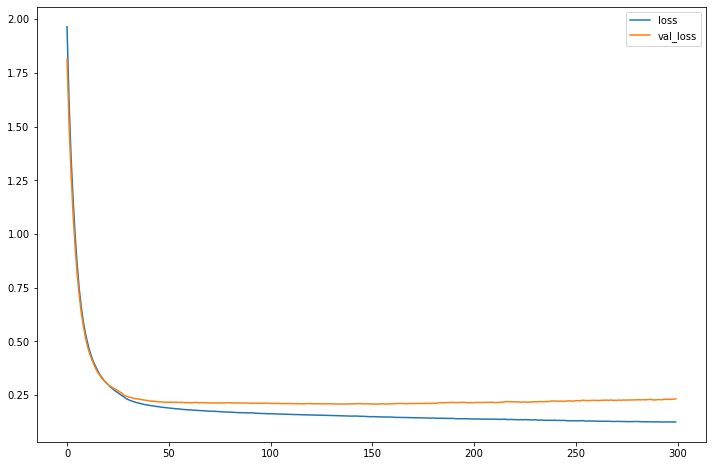

In [33]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

MAE: 0.31804956732479117
MSE: 0.23227597427425928
RMSE: 0.48195017820751895
VarScore: 0.7839803561709145


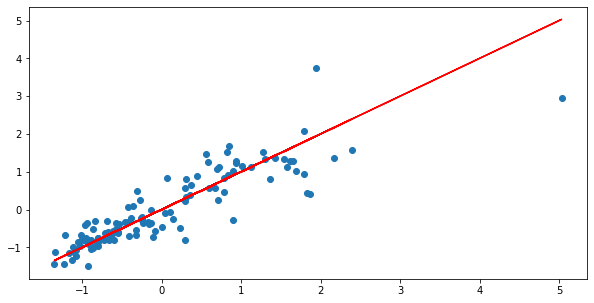

In [34]:
y_pred = model.predict(X_test_scaled)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test_scaled, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test_scaled, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_scaled, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test_scaled,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test_scaled,y_pred)
# Perfect predictions
plt.plot(y_test_scaled,y_test_scaled,'r')

In [35]:
#test
# suburb needs to be categorical
X_test = X_scaler.transform([[4,3,2,175,186,2019,0,0,0,0,1,0]])
predictions = model.predict(X_test)
results = y_scaler.inverse_transform(predictions)
results

array([[1776880.5]], dtype=float32)

In [37]:
# compare actual output values with predicted values
df1 = X_test
df1['Actual'] = y_test.reshape(1,-1)[0]
df1['Keras_Regression_Predicted'] = y_scaler.inverse_transform(model.predict(X_test_scaled))
df1.head(10)

<ipython-input-37-752ab484c03c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Actual'] = y_test.reshape(1,-1)[0]
<ipython-input-37-752ab484c03c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Keras_Regression_Predicted'] = y_scaler.inverse_transform(model.predict(X_test_scaled))


,bedrooms,bathrooms,car_space,land_size,building_size,built_date,perth,west_perth,east_perth,northbridge,crawley,nedlands,Actual,Keras_Regression_Predicted
1318,4,2,3,697,340,2001,0,0,0,0,0,1,1780000,5.503608e+05
108,3,1,2,104,93,1981,1,0,0,0,0,0,802000,5.092746e+05
5,3,2,2,176,185,2000,1,0,0,0,0,0,821000,6.584874e+05
424,2,1,1,91,86,1935,0,1,0,0,0,0,540000,6.316184e+05
1133,3,1,1,104,109,1981,0,0,0,0,0,1,615000,1.898169e+06
1264,6,2,2,1012,283,1955,0,0,0,0,0,1,1875000,1.215494e+06
1160,3,2,1,1034,134,1937,0,0,0,0,0,1,1490000,9.798694e+05
1189,2,2,2,158,131,2002,0,0,0,0,0,1,875000,2.275730e+06
1261,1,1,1,115,91,2006,0,0,0,0,0,1,550000,2.011384e+06
1125,4,2,6,883,282,1938,0,0,0,0,0,1,2480000,2.070028e+06
